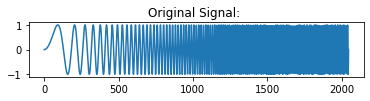

Application of DWT:


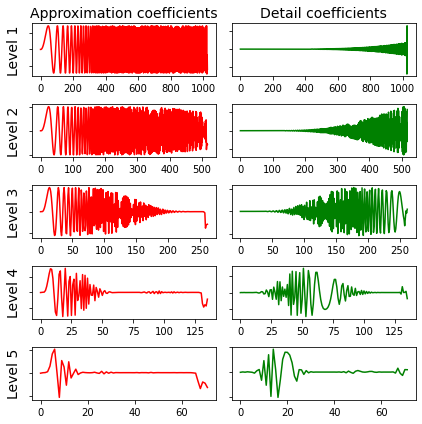

In [5]:
# Suppose we have a signal with frequencies up to 1000 Hz.
# We start by splitting our signal into a low-frequency part and a high-frequency part, 
# Then, we take the low-frequency part and again split it into two parts
# This goes on until we have reached the level of refinement we need or until we run out of samples.

# The following example uses a signal with a dynamic frequency spectrum.
# This means that the frequency spectrum increases with time.
# The start of the signal contains low frequency values and the end of the signal contains the high frequencies.
# This way, we can easiliy visualuze which part of the frequency spectrum is filtered out by looking at the time-axis.

import pywt
import numpy as np
import matplotlib.pyplot as plt

# Create the dimension of time
x = np.linspace(0, 1, num=2048)
# Create the original signal 
original_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Signal: ")
ax.plot(original_signal)
plt.show()

print('Application of DWT:')
    
data = original_signal
# Set the wavelet (i.e. a simpler wave that we will use)
waveletname = 'sym5'

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    # Get the coefficients via the wavelet transform 
    (data, coeff_d) = pywt.dwt(data, waveletname)
    # Draw plot
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

# Store the final coefficients for later
final_level_a = data
final_level_d = coeff_d

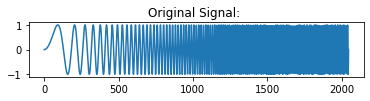

In [6]:
# The approximation coefficients represent the output of the low pass filter (averaging filter) of the DWT.
# The detail coefficients represent the output of the high pass filter (difference filter) of the DWT.

# By applying the DWT again on the approximation coefficients of the previous DWT, 
# we get the wavelet transform of the next level.
# At each next level, the original signal is also sampled down by a factor of 2.

# Let's draw again the original signal
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Signal: ")
ax.plot(original_signal)
plt.show()


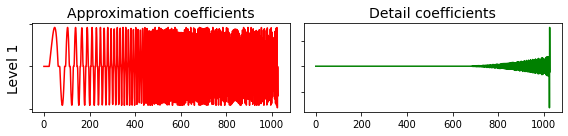

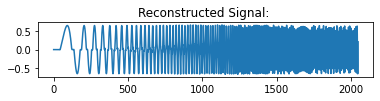

In [7]:
# Get the coefficients via the wavelet transform
(approx, coeff_d) = pywt.dwt(original_signal, waveletname)

# Use thresholding to keep a subset of coefficients. The threshold is the standard deviation/2
cat = pywt.threshold(approx, np.std(approx)/2, mode='soft')
cdt = pywt.threshold(coeff_d, np.std(coeff_d)/2, mode='soft')

fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(8,2))
axarr[0].plot(cat, 'r')
axarr[1].plot(cdt, 'g')
axarr[0].set_ylabel("Level {}".format(1), fontsize=14, rotation=90)
axarr[0].set_yticklabels([])
axarr[0].set_title("Approximation coefficients", fontsize=14)
axarr[1].set_title("Detail coefficients", fontsize=14)
axarr[1].set_yticklabels([])
plt.tight_layout()
plt.show()

ts_rec = pywt.idwt(cat, cdt, waveletname)

fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Reconstructed Signal: ")
ax.plot(ts_rec)
plt.show()

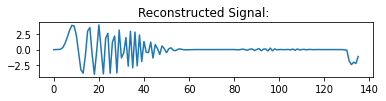

In [8]:
ts_rec = pywt.idwt(final_level_a, final_level_d, waveletname)
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Reconstructed Signal: ")
ax.plot(ts_rec)
plt.show()